# STOCK PRICE PREDICTION USING LSTM

## TAKE STOCK PRICE OF MICROSOFT COMPANY AND PREDICTS ITS PRICE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

C:\Users\User\anaconda3final\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Downloads/MSFT (1).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,111.660004,112.029999,109.339996,110.849998,105.022812,29640600
1,2018-10-09,111.139999,113.080002,110.800003,112.260002,106.358665,26198600
2,2018-10-10,111.239998,111.500000,105.790001,106.160004,100.579330,61376300
3,2018-10-11,105.349998,108.930000,104.199997,105.910004,100.342484,63904300
4,2018-10-12,109.010002,111.239998,107.120003,109.570000,103.810081,47742100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,224.553665,226.937130,222.093887,224.618219,220.334047,3.019279e+07
std,71.893012,72.568703,71.199521,71.901701,72.842915,1.288288e+07
min,95.139999,97.970001,93.959999,94.129997,89.566986,8.989200e+06
25%,153.000000,156.840004,151.640003,154.832500,149.570469,2.194472e+07
50%,235.629998,238.945000,233.199997,235.930000,231.998718,2.699105e+07
75%,284.650010,287.802505,280.572487,284.267494,280.548835,3.425928e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,1.112421e+08


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

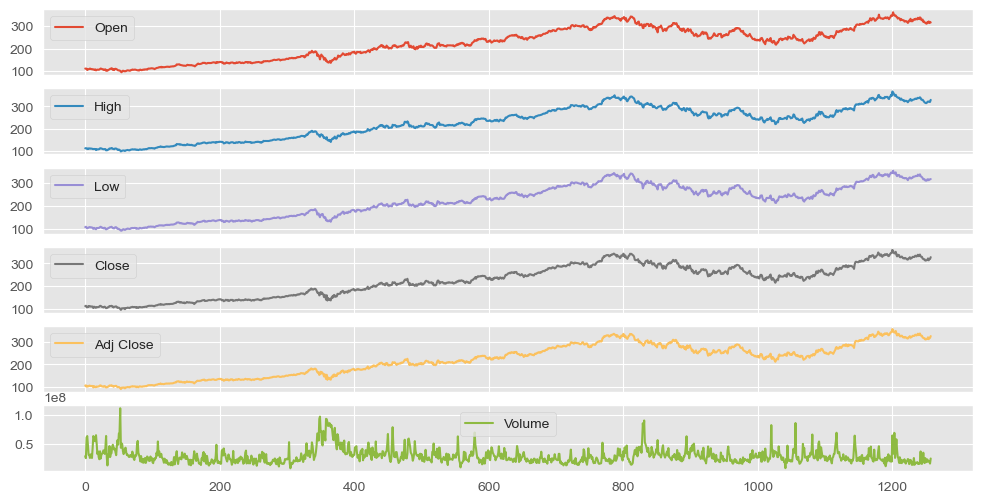

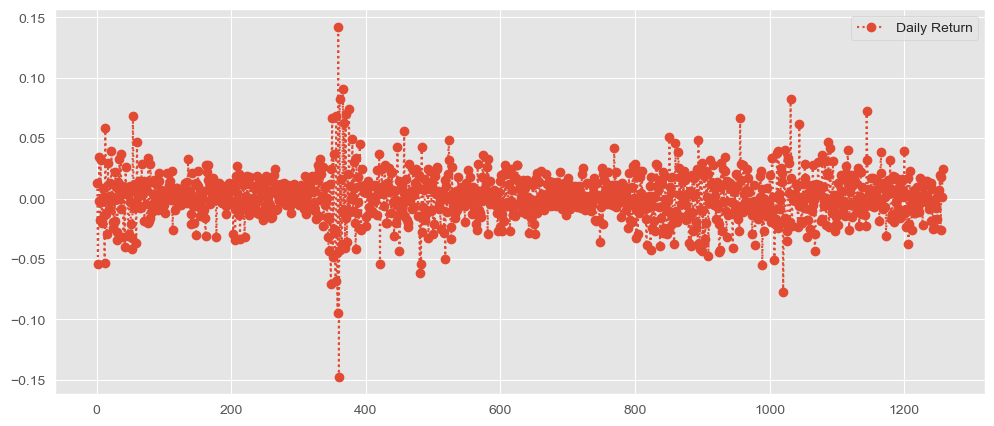

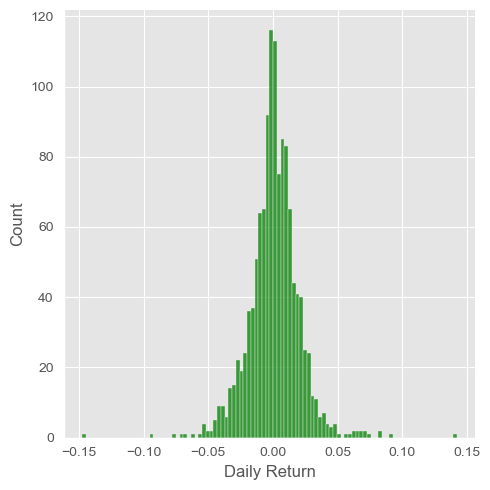

C:\Users\User\AppData\Local\Temp\ipykernel_8728\3952542099.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


            Date        Open        High         Low       Close   Adj Close  \
0     2018-10-08  111.660004  112.029999  109.339996  110.849998  105.022812   
1     2018-10-09  111.139999  113.080002  110.800003  112.260002  106.358665   
2     2018-10-10  111.239998  111.500000  105.790001  106.160004  100.579330   
3     2018-10-11  105.349998  108.930000  104.199997  105.910004  100.342484   
4     2018-10-12  109.010002  111.239998  107.120003  109.570000  103.810081   
...          ...         ...         ...         ...         ...         ...   
1253  2023-10-02  316.279999  321.890015  315.179993  321.799988  321.799988   
1254  2023-10-03  320.829987  321.390015  311.209991  313.390015  313.390015   
1255  2023-10-04  314.029999  320.040009  314.000000  318.959991  318.959991   
1256  2023-10-05  319.089996  319.980011  314.899994  319.359985  319.359985   
1257  2023-10-06  316.549988  329.190002  316.299988  327.260010  327.260010   

        Volume  MA for 10 days  MA for 

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

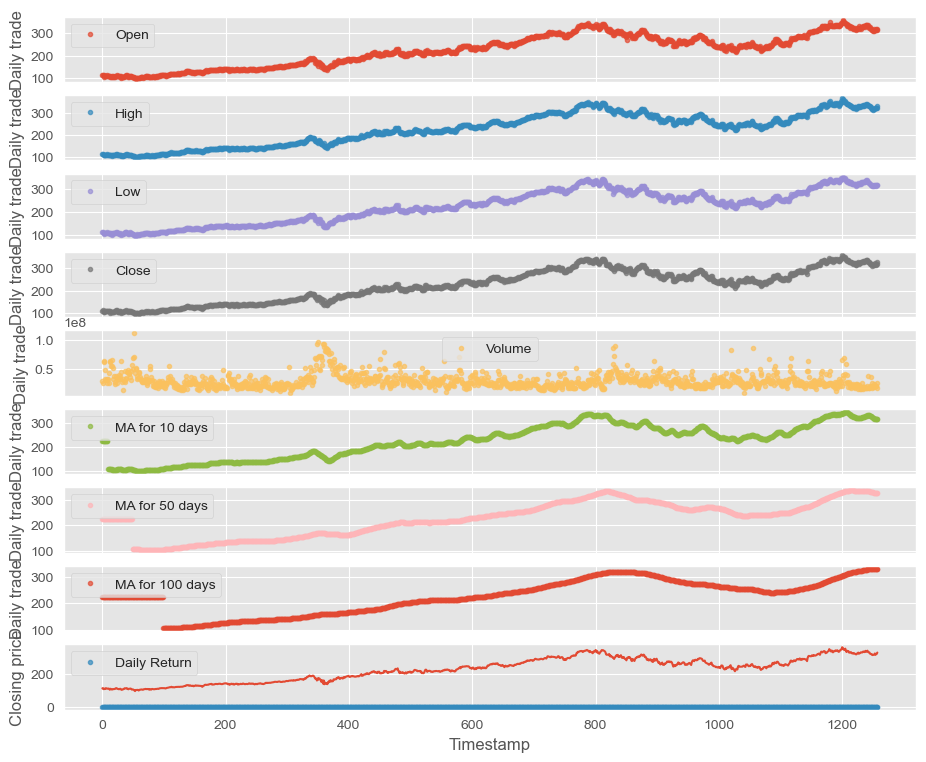

In [7]:
df.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
df.shape
df.size
df.describe(include='all').T
df.dtypes
df.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(df['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(df['Date'])
closing_df1 = pd.DataFrame(df['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

df.nunique()

df.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = df[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.isnull().sum()

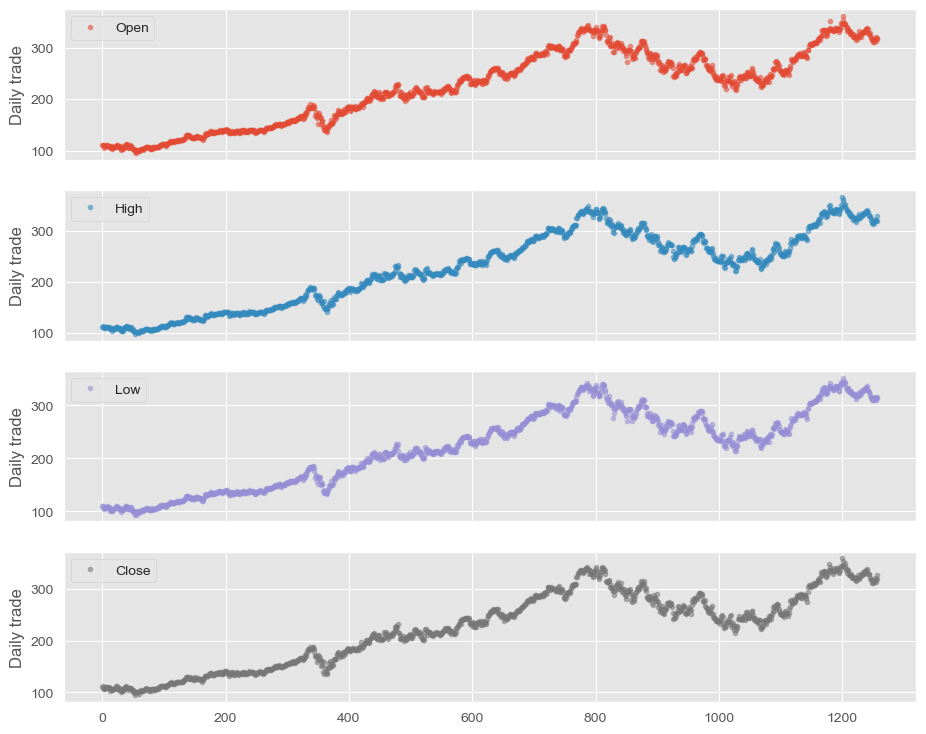

In [8]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date        Open        High         Low       Close   Adj Close  \
0     2018-10-08  111.660004  112.029999  109.339996  110.849998  105.022812   
1     2018-10-09  111.139999  113.080002  110.800003  112.260002  106.358665   
2     2018-10-10  111.239998  111.500000  105.790001  106.160004  100.579330   
3     2018-10-11  105.349998  108.930000  104.199997  105.910004  100.342484   
4     2018-10-12  109.010002  111.239998  107.120003  109.570000  103.810081   
...          ...         ...         ...         ...         ...         ...   
1253  2023-10-02  316.279999  321.890015  315.179993  321.799988  321.799988   
1254  2023-10-03  320.829987  321.390015  311.209991  313.390015  313.390015   
1255  2023-10-04  314.029999  320.040009  314.000000  318.959991  318.959991   
1256  2023-10-05  319.089996  319.980011  314.899994  319.359985  319.359985   
1257  2023-10-06  316.549988  329.190002  316.299988  327.260010  327.260010   

        Volume  MA for 10 days  MA for 

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,2.245537e+02,7.189301e+01,9.514000e+01,1.530000e+02,2.356300e+02,2.846500e+02,3.617500e+02
High,1258.0,2.269371e+02,7.256870e+01,9.797000e+01,1.568400e+02,2.389450e+02,2.878025e+02,3.667800e+02
Low,1258.0,2.220939e+02,7.119952e+01,9.396000e+01,1.516400e+02,2.332000e+02,2.805725e+02,3.524400e+02
Close,1258.0,2.246182e+02,7.190170e+01,9.413000e+01,1.548325e+02,2.359300e+02,2.842675e+02,3.594900e+02
Adj Close,1258.0,2.203340e+02,7.284291e+01,8.956699e+01,1.495705e+02,2.319987e+02,2.805488e+02,3.587305e+02
Volume,1258.0,3.019279e+07,1.288288e+07,8.989200e+06,2.194472e+07,2.699105e+07,3.425928e+07,1.112421e+08
MA for 10 days,1258.0,2.246932e+02,7.116868e+01,9.980200e+01,1.562200e+02,2.350010e+02,2.851650e+02,3.472700e+02
MA for 50 days,1258.0,2.249773e+02,6.786010e+01,1.044524e+02,1.642393e+02,2.371143e+02,2.764601e+02,3.365732e+02
MA for 100 days,1258.0,2.252354e+02,6.312167e+01,1.063992e+02,1.694570e+02,2.277580e+02,2.739468e+02,3.297786e+02
Daily Return,1258.0,1.057488e-03,1.978896e-02,-1.473903e-01,-8.679751e-03,1.005014e-03,1.115255e-02,1.421689e-01


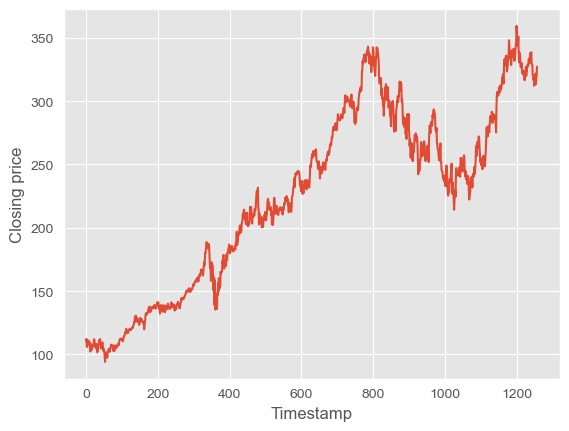

In [9]:
plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.describe().transpose()

In [10]:
from sklearn.model_selection import train_test_split
X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)
train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)
print(len(train_X))
print(len(test_X))

924
232


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
model = tf.keras.Sequential()
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
24/24 [==============================] - 20s 177ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0957 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0608
Epoch 2/40
24/24 [==============================] - 1s 52ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0608 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0510
Epoch 3/40
24/24 [==============================] - 1s 52ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0577 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0464
Epoch 4/40
24/24 [==============================] - 1s 51ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0518 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0448
Epoch 5/40
24/24 [==============================] - 1s 53ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0519 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0443
Epoch 6/40
24/24 [==============================] - 1s 51ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0488 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0474
Epoch 7/40
24/24 [==

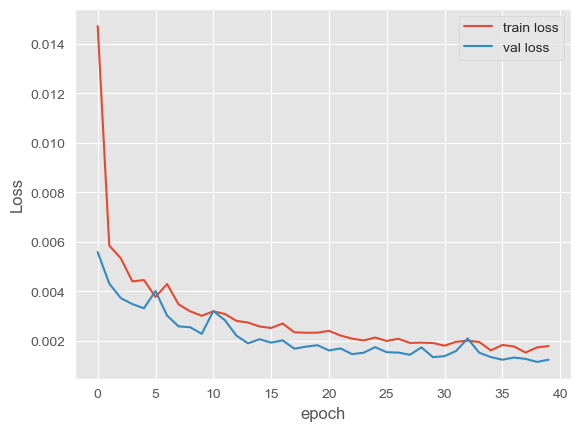

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

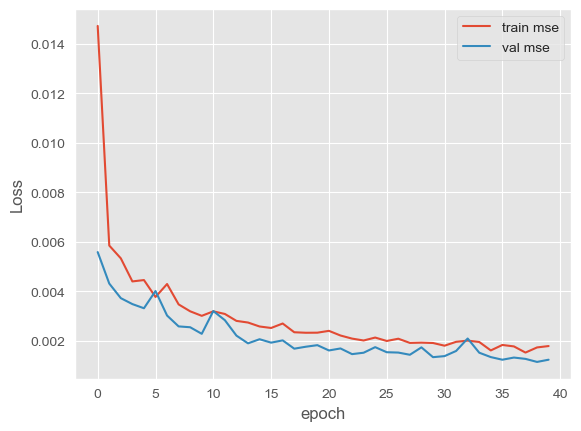

In [13]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

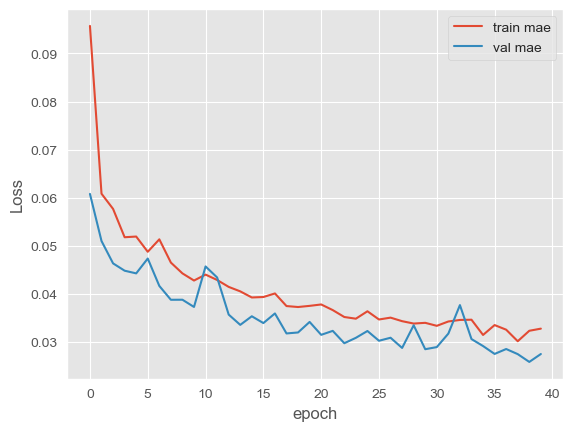

In [14]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [15]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0275


[0.0012299878289923072, 0.0012299878289923072, 0.02751792035996914]

In [16]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
yhat_probs = model.predict(test_X, verbose=0)
yhat_probs = yhat_probs[:, 0]
var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)
r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)
var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.938251
R2 Score: 0.938251
Max Error: 0.096250


8/8 [==============================] - 0s 13ms/step


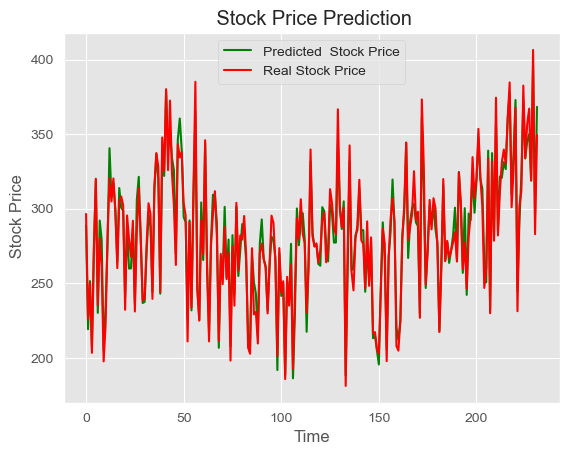

In [17]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()